# Simulateur de traffic routier

**Objectif** : Simuler le traffic dans le cas suivant

<img src="Banque d'image interface\Cas_etude_feux.png" width="500"/>


## Partie 1 : Création de la matrice qui modélisera notre route

### Syntaxte

Il faut voir le schéma du haut comme une compilation de blocs de différentes catégories routes, feux rouges, intersection, cedez le passage, debut, fin etc ...

Ainsi, notre matrice retraduira cet assemblage de blocs afin d'éviter la création de trop grosses matrices (si on redessine toute la route). Chaque élement de la matrice sera donc un élement de la route et devra respecter la syntaxe suivante :

Element = ["Type" = str, Caractéristique du type = int]

Détail pour chaque élements :

- route = ['Route', sens de circulation 0 = ouest, 1 = sud ,2 = est, 3 = nord ]
- intersection = ['Intersection', proba : [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]]
- Feux rouges = ['Feu',sens de circulation, cycles en secondes]
- priorité = ['Priorite',sens de circulation ,coté concerné par la priorité [west : 0, south : 1, east : 0, north : 0]
- Début = ['Debut',sens de circulation, débit = int]
- Fin = ['Fin']

Cependant ces élements ne permetent pas de représenter ni de traiter l'évolution du traffic. C'est pourquoi il faut joindre à ces blocs des blocs 'transport' permettant de modéliser l'évolution du traffic en temps réel.

C'est blocs transport se modéliseront de le manière suivantes :

Transport = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1]

Les 0 sont des espaces vides et les 1 des emplacements occupés. La capacité de l'élement précédant le bloc transport définira la longeur du bloc transport.

Enfin, à chaque itération la suite de 0 et de 1 se déplacera vers la droite et lorsqu'un 1 atteindra le bord droit on ajoutera 1 à l'ocuppation du bloc suivant.

On ajoutera c'est bloc transport à la fin des élements

### Hypothèses

Les voitures ne se déplace pas dinstantanément il y a un effet de 'chaine', ainsi il faudra à minima un 0 devant un & pour qu'il puisse avancer.

### Retour à notre cas

En apliquant le découpage on a :

<img src="Banque d'image interface\Decoupage_route.jpg" width="500"/>


In [40]:
# Cas 1 : feux rouges

Bloc_01 = ["Fin"]
Bloc_02 = ["Intersection", [0, 0, [0.5, 0.5, 0, 0], 0], [0]]
Bloc_03 = ["Intersection", [0, [1, 0, 0, 0], [1, 0, 0, 0], 0], [0]]
Bloc_04 = [
    "Route",
    0,
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]
Bloc_05 = ["Depart", 0, 5]
Bloc_10 = ["Depart", 2, 5]
Bloc_11 = [
    "Route",
    2,
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]
Bloc_12 = ["Intersection", [[0, 0.5, 0.5, 0], 0, 0, [0, 1, 0, 0]], [0]]
Bloc_13 = ["Intersection", [[0, 0, 1, 0], [0, 0, 0.5, 0.5], 0, 0], [0]]
Bloc_14 = ["Fin"]
Bloc_22 = ["Fin"]
Bloc_23 = ["Feu", 3, 20, [0]]
Bloc_33 = [
    "Route",
    3,
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]
Bloc_43 = ["Depart", 3, 5]


tab = [
    [0, Bloc_01, Bloc_02, Bloc_03, Bloc_04, Bloc_05],
    [Bloc_10, Bloc_11, Bloc_12, Bloc_13, Bloc_14, 0],
    [0, 0, Bloc_22, Bloc_23, 0, 0],
    [0, 0, 0, Bloc_33, 0, 0],
    [0, 0, 0, Bloc_43, 0, 0],
]

print(tab)

[[0, ['Fin'], ['Intersection', [0, 0, [0.5, 0.5, 0, 0], 0], [0]], ['Intersection', [0, [1, 0, 0, 0], [1, 0, 0, 0], 0], [0]], ['Route', 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Depart', 0, 5]], [['Depart', 2, 5], ['Route', 2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], ['Intersection', [[0, 0.5, 0.5, 0], 0, 0, [0, 1, 0, 0]], [0]], ['Intersection', [[0, 0, 1, 0], [0, 0, 0.5, 0.5], 0, 0], [0]], ['Fin'], 0], [0, 0, ['Fin'], ['Feu', 3, 20, [0]], 0, 0], [0, 0, 0, ['Route', 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 0, 0], [0, 0, 0, ['Depart', 3, 5], 0, 0]]


## Modèle physique

Retouver graph dans la doc mais en gros un utlisateur avance si devatn lui il y a au moins une distance suffisante + 1s de temps de réponse.

On a besoin de créer un module qui permet de faire bouger des voitures selon ces régles dans le bloc transport de chaque éléments.

Pour rappel le mouvement des voitures se fera de la gauche ver la droite ainsi la première voiture à bouger est la dernière dans la liste.

Chaque itération vaut 1 seconde.


In [13]:
# Tous les imports et variables

import copy
import time
import matplotlib.pyplot as plt
import numpy as np


transp = [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]

In [53]:
# Trouve les intersections

'''Premiere étape faire passer les voitures qui sont arrivées à la fin de l'élement vers les blocs adjacents libres'''
'''On vient examiner chaque élément de la route'''
'''Chaque élémént à sa particularité:'''
'''Route il suffit que l'espace adjacent soit libre'''
'''Feu rouge il faut que le feu soit vert et qu'il n'y est personne en face'''
'''Priorité en fonction des intention de l'utilisateur il faut que il n'y est personne sur l'extrémitée des routes qui coupe la priorité'''
'''Intersection en fonction des intentions de l'utilisateur il faut que le bloc concerné soit libre'''
'''Départ et fin à part'''
'''La fin est un bloc tout le temps disponible'''
'''Plus règle de la prioritée à droite'''
'''Il faudrait faire l'inventaire des voitures qui veulent changer d'élément avec destination associé'''
'''Les éléments devrait également être classé par ordre de prorité'''
'''Syntaxte des éléments des priorité [pos de départ, pos d'arrivé, vers intersection ]'''
'''Le classement des prioirités ne concerne que les blocs qui veulent aller sur les blocs intersections'''
'''Chaque utilisateur est indépendant'''

'''On définit une fonction qui associe à chaque bloc d'intersection un numéro'''

def dfs(matrix, visited, x, y, label):
    # Directions pour les voisins (haut, bas, gauche, droite)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    stack = [(x, y)]
    
    while stack:
        cx, cy = stack.pop()
        if not (0 <= cx < len(matrix) and 0 <= cy < len(matrix[0])) or visited[cx][cy] or matrix[cx][cy] == 0:
            continue
        
        visited[cx][cy] = True
        matrix[cx][cy] = label 
        
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            stack.append((nx, ny))


def intersection(route):

    inter = np.zeros((len(route),len(route[0])))
    visite = [[False] * len(inter[0])  for _ in range(len(inter))]

    for i in range(len(route)):
        for j in range(len(route[i])):
            if route[i][j] != 0 and route[i][j][0] == 'Intersection':
                inter[i][j] = 1
    
    label = 0 

    for i in range(len(inter)):
        for j in range(len(inter[0])):
            if inter[i][j] == 1 and not visite[i][j]:
                label += 1
                dfs(inter, visite, i, j, label)
    
    return inter

'''Fonction pour les priorités objectif on veut un tableau qui classe par ordre croissant de priorité les inteentiosn des utilisateurs
voulant changer de bloc'''
'''Etape 1 : Faire l'inventaire de tous les intentiosn des utilisateurs'''

def priorite():

    res = []




    return res











def mouvement(route):
    '''Pour rappel la route est une matrice 2x2'''
    ref = copy.deepcopy(route)       
             
    '''Deuxième étape : on vient faire bouger chaque voiture dans les blocs de transport'''

    for i in range(2, len(liste) + 1):
        if liste[-i] == 1 and liste[-i + 1] == 0 and ref[-i + 1] == 0:
            liste[-i] = 0
            liste[-i + 1] = 1
    
    return liste

[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


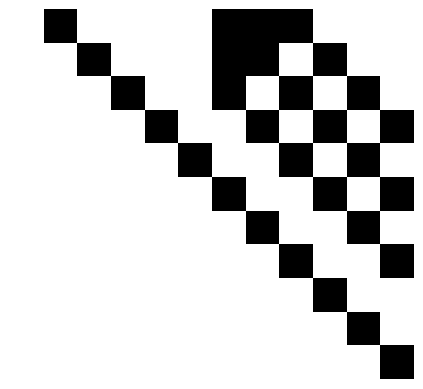

In [27]:
# Simulation

transp = [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]

def simulation(n,tab):
    fig, ax = plt.subplots()
    liste = []
    liste.append(copy.deepcopy(tab))
    for i in range(n):
        liste.append(copy.deepcopy(mouvement(tab)))
    matrice = np.array(liste)
    matrice_inverse = 1 - matrice
    ax.imshow(matrice_inverse, cmap='gray', interpolation='none', vmin=0, vmax=1, aspect='equal')
    ax.axis('off')
    plt.show()

simulation(10,transp)


In [35]:
def dfs(matrix, visited, x, y, label):
    # Directions pour les voisins (haut, bas, gauche, droite et diagonales)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    stack = [(x, y)]  # Utiliser une pile pour DFS
    
    while stack:
        cx, cy = stack.pop()
        if not (0 <= cx < len(matrix) and 0 <= cy < len(matrix[0])) or visited[cx][cy] or matrix[cx][cy] == 0:
            continue
        
        visited[cx][cy] = True
        matrix[cx][cy] = label  # Marquer la cellule avec le numéro de la tâche
        
        # Ajouter les voisins à la pile
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            stack.append((nx, ny))

def trouver_taches(matrix):
    if not matrix:
        return matrix, 0
    
    rows, cols = len(matrix), len(matrix[0])
    visited = [[False] * cols for _ in range(rows)]
    label = 0  # Compteur pour le numéro de la tâche

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and not visited[i][j]:
                label += 1
                dfs(matrix, visited, i, j, label)
    
    return matrix, label

# Exemple de tableau avec des tâches aléatoires
tableau = [
    [0, 1, 0, 0, 1],
    [1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [1, 0, 0, 1, 1]
]

# Trouver et numéroter les tâches
tableau_numero, nombre_taches = trouver_taches(tableau)

print("Tableau avec les tâches numérotées :")
for row in tableau_numero:
    print(row)
print(f"Nombre de tâches : {nombre_taches}")


Tableau avec les tâches numérotées :
[0, 1, 0, 0, 2]
[1, 1, 0, 3, 0]
[0, 0, 3, 3, 0]
[0, 4, 0, 0, 5]
[6, 0, 0, 5, 5]
Nombre de tâches : 6
